Task 1

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv('./Boston_Housing.csv')

prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
# Success
print ("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 506 data points with 15 variables each.


In [14]:
# TODO: Minimum price of the data
minimum_price = np.amin(prices)

# TODO: Maximum price of the data
maximum_price = np.amax(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print ("Statistics for Boston housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $5.00
Maximum price: $50.00
Mean price: $22.53
Median price $21.20
Standard deviation of prices: $9.19


In [15]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values (if any)
# data = data.dropna()
data = data.fillna(data.mean())

Type         0
CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATION    54
B - 1000     0
LSTAT        0
MEDV         0
dtype: int64


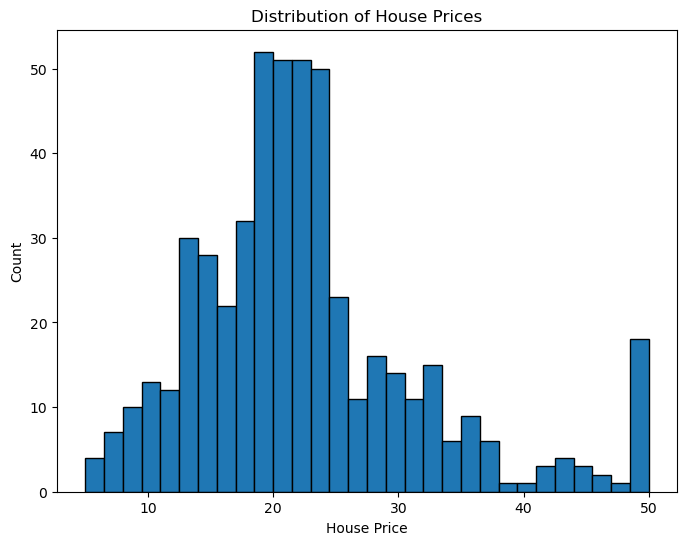

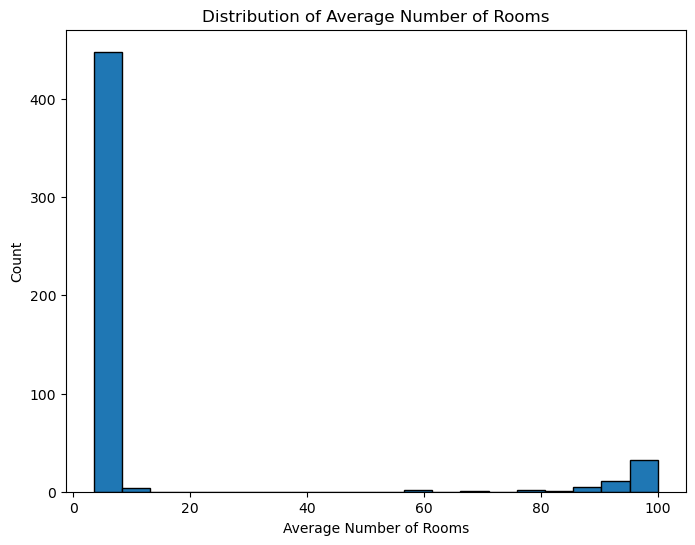

In [16]:
# Distribution of target variable (house prices)
plt.figure(figsize=(8, 6))
plt.hist(data['MEDV'], bins=30, edgecolor='black')
plt.xlabel('House Price')
plt.ylabel('Count')
plt.title('Distribution of House Prices')
plt.show()

# Distribution of feature 'RM' (average number of rooms per dwelling)
plt.figure(figsize=(8, 6))
plt.hist(data['RM'], bins=20, edgecolor='black')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Count')
plt.title('Distribution of Average Number of Rooms')
plt.show()


Task 2

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [19]:
# X: Feature matrix, y: Target vector
X = data.drop('MEDV', axis=1)  # Drop the target variable from the features
y = data['MEDV']  # Target variable

# Print the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (506, 14)
Shape of y: (506,)


In [20]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features in X
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with the scaled numerical features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Print the first few rows of the scaled data
print(X_scaled_df.head())

   Type      CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0   0.0 -0.526893  0.204324 -0.962669 -0.450511 -0.342280 -0.334818  0.195195   
1   0.0 -0.518136 -0.577404 -0.298101 -0.450511 -0.384216 -0.340481  0.609451   
2   0.0 -0.518144 -0.577404 -0.298101 -0.450511 -0.384216 -0.312386  0.071220   
3   0.0 -0.516024 -0.577404 -0.980819 -0.450511 -0.390902 -0.319263 -0.391416   
4   0.0 -0.500721 -0.577404 -0.980819 -0.450511 -0.390902 -0.313783 -0.137420   

        DIS       RAD       TAX  PTRATION  B - 1000     LSTAT  
0 -0.321993 -0.378985 -0.239999 -1.418895  0.441052 -1.075562  
1 -0.186430 -0.374068 -0.539182 -0.215268  0.441052 -0.492439  
2 -0.186430 -0.374068 -0.539182 -0.215268  0.396427 -1.208727  
3 -0.017173 -0.369150 -0.649991  0.218037  0.416163 -1.361517  
4 -0.017173 -0.369150 -0.649991  0.218037  0.441052 -1.026501  


In [25]:
# Assuming 'categorical_features' is a list of categorical feature names
categorical_features = ['CHAS', 'RAD']
encoder = OneHotEncoder(sparse=False, drop='first')  # 'sparse=False' returns a dense array, 'drop='first'' drops the first category as a reference

# Fit and transform the categorical features in X
X_encoded = encoder.fit_transform(X[categorical_features])

# Create a new DataFrame with the encoded categorical features
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate the scaled numerical features and encoded categorical features
X_processed = pd.concat([X_scaled_df, X_encoded_df], axis=1)

# Print the first few rows of the processed data
print(X_processed.head())

   Type      CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0   0.0 -0.526893  0.204324 -0.962669 -0.450511 -0.342280 -0.334818  0.195195   
1   0.0 -0.518136 -0.577404 -0.298101 -0.450511 -0.384216 -0.340481  0.609451   
2   0.0 -0.518144 -0.577404 -0.298101 -0.450511 -0.384216 -0.312386  0.071220   
3   0.0 -0.516024 -0.577404 -0.980819 -0.450511 -0.390902 -0.319263 -0.391416   
4   0.0 -0.500721 -0.577404 -0.980819 -0.450511 -0.390902 -0.313783 -0.137420   

        DIS       RAD  ...  CHAS_1.0  RAD_2  RAD_3  RAD_4  RAD_5  RAD_6  \
0 -0.321993 -0.378985  ...       0.0    0.0    0.0    0.0    0.0    0.0   
1 -0.186430 -0.374068  ...       0.0    1.0    0.0    0.0    0.0    0.0   
2 -0.186430 -0.374068  ...       0.0    1.0    0.0    0.0    0.0    0.0   
3 -0.017173 -0.369150  ...       0.0    0.0    1.0    0.0    0.0    0.0   
4 -0.017173 -0.369150  ...       0.0    0.0    1.0    0.0    0.0    0.0   

   RAD_7  RAD_8  RAD_24  RAD_666  
0    0.0    0.0     0.0    

/usr/local/anaconda3/envs/venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Task 3

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [27]:
# Split the preprocessed data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (Coefficient of Determination):", r2)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.Mean Squared Error (MSE): 25.050679703874472
Root Mean Squared Error (RMSE): 5.005065404555117
Mean Absolute Error (MAE): 3.51575695409543
R-squared (Coefficient of Determination): 0.6584019175840354



Task 4

In [28]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
degree = 2  # Specify the degree of the polynomial features
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Initialize and fit the Linear Regression model with polynomial features
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Make predictions on the test set using the polynomial model
y_poly_pred = poly_model.predict(X_poly_test)

# Calculate evaluation metrics for the polynomial model
poly_mse = mean_squared_error(y_test, y_poly_pred)
poly_rmse = mean_squared_error(y_test, y_poly_pred, squared=False)
poly_mae = mean_absolute_error(y_test, y_poly_pred)
poly_r2 = r2_score(y_test, y_poly_pred)

# Print the evaluation metrics for the polynomial model
print("Polynomial Degree:", degree)
print("Mean Squared Error (MSE):", poly_mse)
print("Root Mean Squared Error (RMSE):", poly_rmse)
print("Mean Absolute Error (MAE):", poly_mae)
print("R-squared (Coefficient of Determination):", poly_r2)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Task 5

Conclusion:

Importance of Predicting Median Home Values using Linear Regression:
Predicting median home values using linear regression is important for several reasons. Firstly, it provides valuable insights for real estate professionals, homeowners, and potential buyers to make informed decisions. Accurate predictions can help determine fair pricing, negotiate deals, and understand the market trends. Additionally, it aids policymakers and urban planners in assessing housing affordability and developing strategies for housing development and urban growth.

Relevant Variables and Determination:
In predicting median home values, several variables can be relevant. In the case of the Boston Housing dataset, the features provided include information such as the number of rooms, crime rate, pupil-teacher ratio, etc. Determining the relevance of variables can be done through domain knowledge, exploratory data analysis, and statistical techniques. Understanding the relationship between the variables and the target variable (median home values) is crucial. This can be achieved through correlation analysis, feature importance techniques, and prior knowledge of the housing market.

Overall Model Performance and Effective Hyperparameter Tuning:
The overall performance of the models depends on various factors, including the preprocessing techniques, feature selection, model selection, and hyperparameter tuning. In the case of linear regression, the evaluation metrics such as mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), and R-squared (coefficient of determination) are commonly used to assess performance.

Hyperparameter tuning techniques, such as adjusting the polynomial degree, can significantly impact the model's performance. In the given task, creating polynomial features and evaluating the performance for different degrees allowed for capturing non-linear relationships. The most effective hyperparameter tuning technique can be determined by comparing the evaluation metrics for different settings and selecting the one that yields the best results. It is important to strike a balance between complexity (overfitting) and model performance.

Challenges Faced:
While working on predicting median home values using linear regression, several challenges may arise. Some common challenges include:

a. Outliers: The presence of outliers in the dataset can affect the model's performance. Outliers may have a disproportionate influence on the regression line, leading to inaccurate predictions. Appropriate outlier detection and handling techniques, such as removing outliers or using robust regression methods, can mitigate this challenge.

b. Multicollinearity: When there is high correlation between predictor variables (multicollinearity), it can cause instability in the model and affect the interpretability of coefficients. Techniques like feature selection or regularization (e.g., ridge regression) can help address this issue.

c. Non-linearity: Linear regression assumes a linear relationship between the predictors and the target variable. However, in real-world scenarios, non-linear relationships may exist. Techniques like polynomial regression or using non-linear transformations of features can be employed to capture non-linear patterns.

d. Data quality and missing values: Ensuring data quality and handling missing values appropriately is crucial. Missing values can distort the model's performance if not handled properly. Techniques such as imputation or dropping missing values can be used based on the dataset's characteristics and the missing data pattern.

Overcoming these challenges requires careful data preprocessing, feature engineering, and appropriate model selection.

In summary, predicting median home values using linear regression is important for various stakeholders in the real estate domain. Determining relevant variables involves a combination of domain knowledge and statistical techniques. The overall performance of the models can be assessed using evaluation metrics, and hyperparameter tuning techniques, such as adjusting the polynomial degree, can significantly impact the model's performance. However, challenges such as outliers, multicollinearity, non-linearity, and missing values need to be addressed for accurate predictions. By understanding these factors and applying appropriate techniques, linear regression models can provide valuable insights into median home values and contribute to decision-making processes in the real estate industry.